In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

In [2]:
df1 = pd.read_csv("Data/train_data.csv")
df2 = pd.read_csv("Data/test_data.csv")
df = pd.concat([df1,df2])

In [3]:
def plot_normalized_numerical_data(data_column, title, bin_size):
    minlength = min(data_column.values)
    maxlength = max(data_column.values)
    bins = int((maxlength - minlength)/bin_size)+1
    differences =pd.to_numeric(data_column, errors='coerce')
    plt.title(title)
    differences.hist(bins=bins, weights = np.ones(len(data_column))/(len(data_column)*bin_size))

# Let's look into data

In [4]:
print("We have ",len(df), " data rows")

We have  365385  data rows


Info about columns:

In [5]:
print("We have ",len(df.columns)," columns: ",df.columns.values)

We have  13  columns:  ['Unnamed: 0' 'PreviousComps' 'Sex' 'Equipment' 'Age' 'Wilks' 'Tested'
 'Year' 'Month' 'Day' 'Weekday' 'BodyweightKg' 'WilksRangeCat']


Info how much experience people have according to previous competition

count    365385.000000
mean          4.897782
std           7.005123
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max         139.000000
Name: PreviousComps, dtype: float64


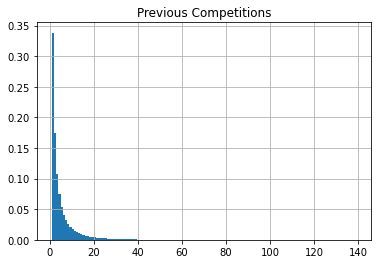

In [28]:
plot_normalized_numerical_data(df['PreviousComps'], "Previous Competitions", 1)
print(df.PreviousComps.describe())

count     365385
unique         2
top            M
freq      254452
Name: Sex, dtype: object


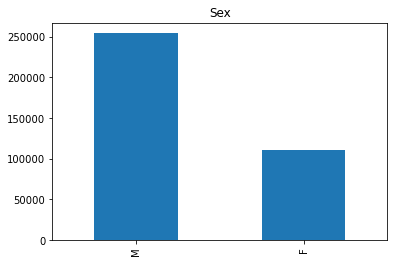

In [7]:
df['Sex'] = df['Sex'].replace(0,'M')
df['Sex'] = df['Sex'].replace(1,'F')
df.Sex.value_counts().plot(kind="bar", title="Sex")
print(df.Sex.describe())

count     365385
unique         2
top          Raw
freq      205805
Name: Equipment, dtype: object


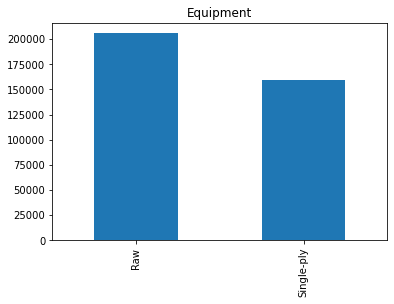

In [8]:
df['Equipment'] = df['Equipment'].replace(0,'Raw') # Without extra equipment
df['Equipment'] = df['Equipment'].replace(1,'Single-ply')# With special uniform
df.Equipment.value_counts().plot(kind="bar", title="Equipment")
print(df.Equipment.describe())

count    365385.000000
mean         29.430291
std          12.231289
min          15.000000
25%          20.500000
50%          25.500000
75%          36.000000
max          95.500000
Name: Age, dtype: float64


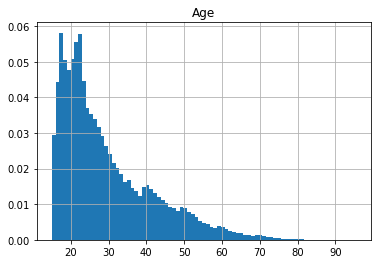

In [9]:
plot_normalized_numerical_data(df['Age'], "Age", 1)
print(df.Age.describe())

count    365385.000000
mean        371.844212
std          81.691400
min          37.290000
25%         315.780000
50%         367.680000
75%         424.460000
max         691.800000
Name: Wilks, dtype: float64


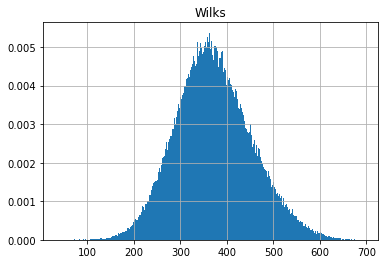

In [10]:
plot_normalized_numerical_data(df['Wilks'], "Wilks", 1)
print(df.Wilks.describe())

count     365385
unique         2
top          Yes
freq      302603
Name: Tested, dtype: object


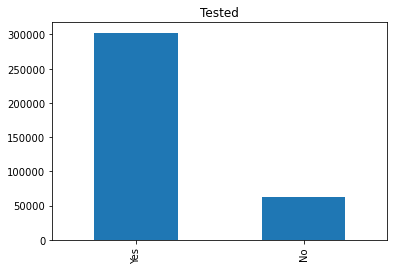

In [11]:
df['Tested'] = df['Tested'].replace(0,'No') # In given competition there were no testing
df['Tested'] = df['Tested'].replace(1,'Yes')#  In given competition there were testing
df.Tested.value_counts().plot(kind="bar", title="Tested")
print(df.Tested.describe())

count    365385.000000
mean         14.711849
std           8.638300
min           1.000000
25%           7.000000
50%          14.000000
75%          22.000000
max          31.000000
Name: Day, dtype: float64


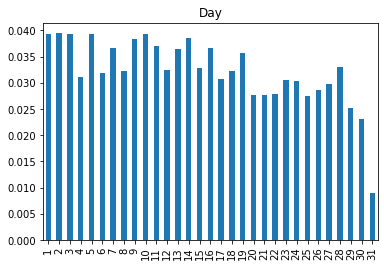

In [12]:
df.Day.value_counts(normalize=True, sort=False).plot(kind="bar", title="Day" )
print(df.Day.describe())

count    365385.000000
mean          6.185413
std           3.490404
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          12.000000
Name: Month, dtype: float64


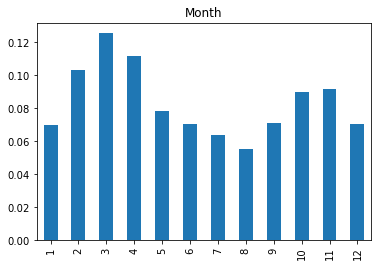

In [13]:
df.Month.value_counts(normalize=True, sort=False).plot(kind="bar", title="Month" )
print(df.Month.describe())

count    365385.000000
mean       2012.178349
std           7.621047
min        1965.000000
25%        2010.000000
50%        2015.000000
75%        2017.000000
max        2019.000000
Name: Year, dtype: float64


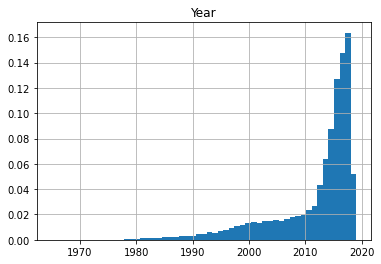

In [14]:
plot_normalized_numerical_data(df['Year'], "Year", 1)
print(df.Year.describe())

count    365385.000000
mean          4.265917
std           1.528779
min           0.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           6.000000
Name: Weekday, dtype: float64


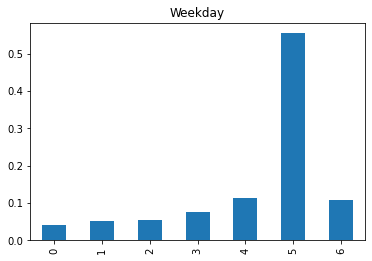

In [15]:
df.Weekday.value_counts(normalize=True, sort=False).plot(kind="bar", title="Weekday" )
print(df.Weekday.describe())

count    365385.000000
mean         82.834885
std          22.030773
min          24.950000
25%          66.400000
50%          81.100000
75%          96.400000
max         242.400000
Name: BodyweightKg, dtype: float64


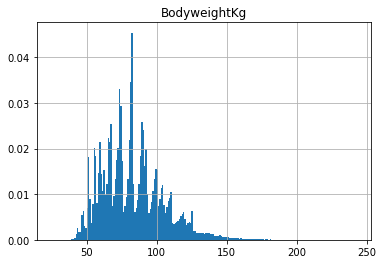

In [16]:
plot_normalized_numerical_data(df['BodyweightKg'], "BodyweightKg", 1)
print(df.BodyweightKg.describe())

<Figure size 432x288 with 0 Axes>

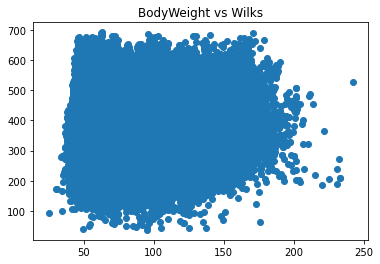

In [17]:
def scatter_plot(x,y,title):
    #plt.style.use(['dark_background'])
    fig = plt.figure()
    fig, ax = plt.subplots(nrows=1, ncols=1)
    plt.title(title)
    plt.scatter(x,y)
    plt
    #fig.patch.set_facecolor('#23293b')
    #ax.set_facecolor('#23293b')
    plt.show()
scatter_plot(df['BodyweightKg'],df['Wilks'], "BodyWeight vs Wilks")

<Figure size 432x288 with 0 Axes>

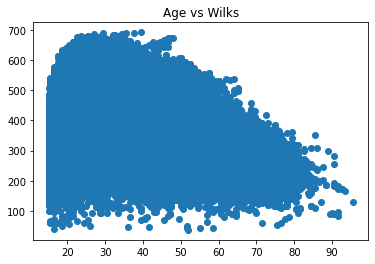

In [18]:
scatter_plot(df['Age'],df['Wilks'], "Age vs Wilks")

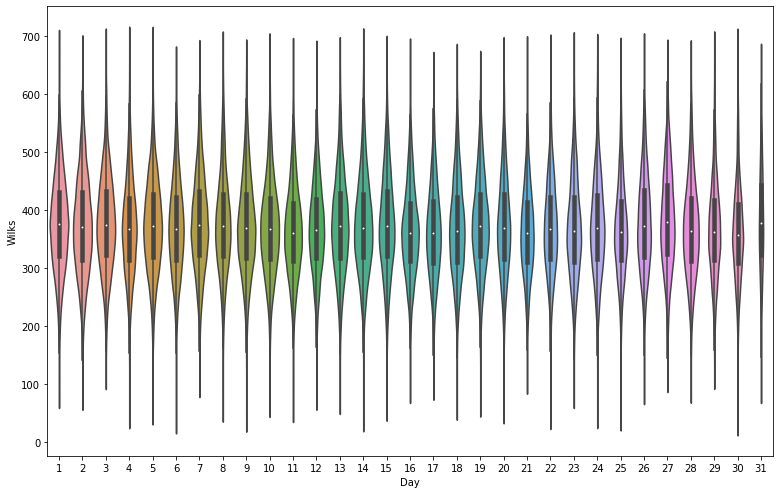

In [19]:
a4_dims = (13, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, x="Day", y="Wilks", data=df, scale="count")

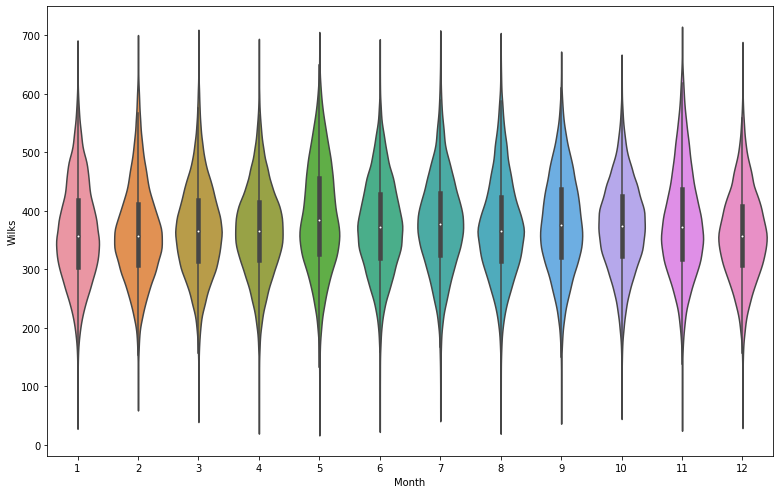

In [20]:
a4_dims = (13, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,x="Month", y="Wilks", data=df)

<Figure size 432x288 with 0 Axes>

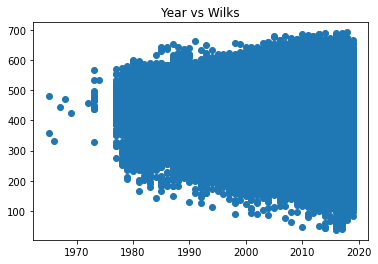

In [21]:
scatter_plot(df['Year'],df['Wilks'], "Year vs Wilks")

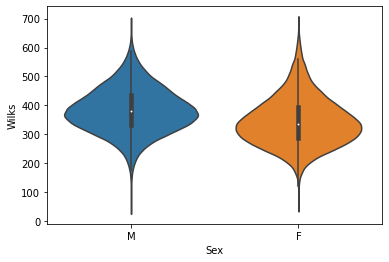

In [22]:
sns.violinplot(x="Sex", y="Wilks", data=df)

<Figure size 432x288 with 0 Axes>

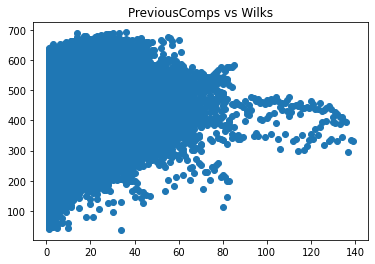

In [23]:
scatter_plot(df['PreviousComps'],df['Wilks'], "PreviousComps vs Wilks")

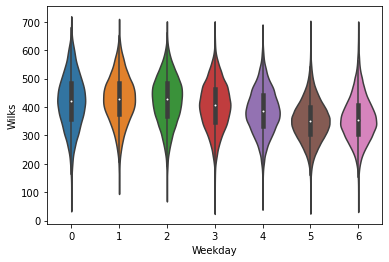

In [24]:
sns.violinplot(x="Weekday", y="Wilks", data=df)

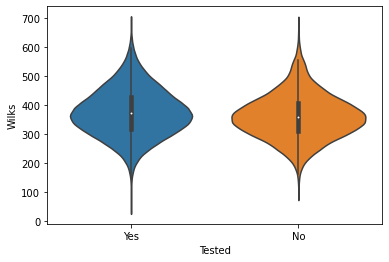

In [25]:
ax = sns.violinplot(x="Tested", y="Wilks", data=df)